In [9]:
!mkdir -p ~/ .kaggle

In [10]:
!cp kaggle.json ~/.kaggle/

In [11]:
!chmod 600 /root/.kaggle/kaggle.json

In [12]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.06G/1.06G [00:04<00:00, 259MB/s]
100% 1.06G/1.06G [00:04<00:00, 264MB/s]


In [16]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [17]:
!pip install keras==2.12.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 30.6 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.14.0 requires keras<2.15,>=2.14.0, but you have keras 2.12.0 which is incompatible.


In [18]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [19]:
train_ds=keras.utils.image_dataset_from_directory(
    directory=r'/content/train',
    batch_size=32,
    image_size=(256,256),
    labels="inferred",
    label_mode="int"

)

validation_ds=keras.utils.image_dataset_from_directory(
    directory=r'/content/test',
    batch_size=32,
    image_size=(256,256),
    labels="inferred",
    label_mode="int"


)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [20]:
for i in train_ds:
    print(i)

Streaming output truncated to the last 5000 lines.
         [118.37491  , 128.37491  ,  93.37491  ],
         [122.28125  , 132.28125  ,  97.28125  ]],

        [[125.97266  ,  97.25391  ,  32.61328  ],
         [130.72491  ,  94.814606 ,  32.146637 ],
         [130.28711  ,  89.43945  ,  29.786713 ],
         ...,
         [114.203125 , 124.203125 ,  90.203125 ],
         [117.07782  , 127.07782  ,  93.07782  ],
         [119.89453  , 129.89453  ,  95.89453  ]],

        ...,

        [[195.68039  , 164.88531  , 151.51102  ],
         [175.4375   , 141.48648  , 130.02734  ],
         [174.26523  , 137.20508  , 124.02615  ],
         ...,
         [129.0922   , 128.46524  ,  96.3461   ],
         [130.1062   , 129.47925  ,  97.36011  ],
         [134.57983  , 133.95288  , 101.83374  ]],

        [[182.80511  , 150.22894  , 135.22894  ],
         [173.49033  , 138.70749  , 122.963165 ],
         [172.81235  , 137.38852  , 119.66     ],
         ...,
         [136.70148  , 136.61539  , 1

In [21]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [22]:
model=Sequential()

In [23]:
model.add(Conv2D(32,kernel_size=(3,3),padding="valid",activation="relu",input_shape=(256,256,3)))
model.add((MaxPooling2D(pool_size=(2,2),strides=2,padding='valid')))

model.add(Conv2D(64,kernel_size=(3,3),padding="valid",activation="relu",input_shape=(256,256,3)))
model.add((MaxPooling2D(pool_size=(2,2),strides=2,padding='valid')))

model.add(Conv2D(128,kernel_size=(3,3),padding="valid",activation="relu",input_shape=(256,256,3)))
model.add((MaxPooling2D(pool_size=(2,2),strides=2,padding='valid')))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [25]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [26]:
model.fit(train_ds,epochs=2,validation_data=validation_ds)

Epoch 1/2
625/625 [==============================] - 83s 113ms/step - loss: 0.6244 - accuracy: 0.6418 - val_loss: 0.5491 - val_accuracy: 0.7152
Epoch 2/2
625/625 [==============================] - 59s 94ms/step - loss: 0.4750 - accuracy: 0.7715 - val_loss: 0.4624 - val_accuracy: 0.7864


In [27]:
import matplotlib.pyplot as plt

In [39]:
dog_image=plt.imread(r"/content/dog sampl.jpeg")

In [48]:
cat_image=plt.imread(r"/content/cat image.jpeg")

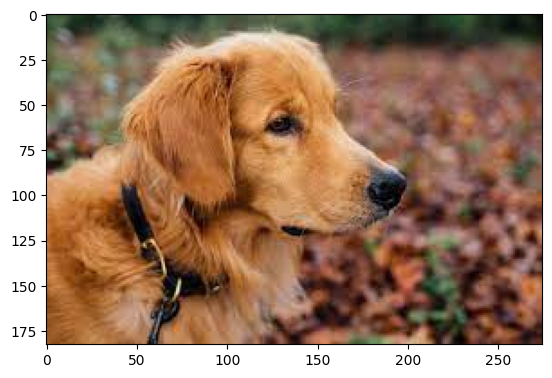

In [40]:
plt.imshow(dog_image)

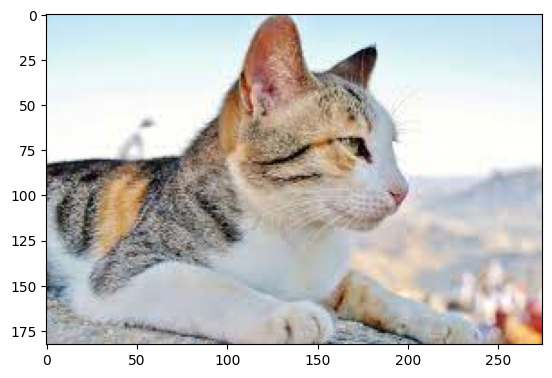

In [49]:
plt.imshow(cat_image)

In [41]:
dog_image.shape

(183, 275, 3)

In [50]:
cat_image.shape

(183, 275, 3)

In [51]:
import cv2
dog_resize=cv2.resize(dog_image,(256,256))
cat_resize=cv2.resize(cat_image,(256,256))

In [43]:
dog_resize.shape

(256, 256, 3)

In [52]:
cat_resize.shape

(256, 256, 3)

In [44]:
dog_resize=dog_resize.reshape((1,256,256,3))


In [53]:
cat_resize=cat_resize.reshape((1,256,256,3))

In [45]:
pred=model.predict(dog_resize)

1/1 [==============================] - 0s 219ms/step


In [54]:
pred=model.predict(cat_resize)

1/1 [==============================] - 0s 42ms/step


In [55]:
if pred==0:
    print("this is a image of cat")
else:
    print("this is a image of dog")

this is a image of cat
